# Esempi sulle liste

Da ora in poi la maggior parte dei nostri esercizi consisterà nella scrittura di funzioni piuttosto che di programmi completi. Le funzioni potremo chiamarle successivamente da altre celle del notebook per testarne il funzionamento.

## Funzioni che usano le liste solo in lettura

### La funzione `somma_lista`

**Scrivere una funzione `somma_lista(l)` che somma tutti i numeri presenti nella lista l restituisce il risultato della somma.**

Ad esempio, se `somma_list([1, 2, 10, 18] = 31`.

Notare che in Python esiste già una funzione che fa questo lavoro: la funzione `sum`.

In [2]:
def somma_lista(l):
    """Restituisce la somma degli elementi di l."""
    # la variabile somma contiene la somma parziale degli elementi di l
    somma = 0
    # il ciclo for scorre gli elementi di l mettendoli uno alla volta dentro
    # la variabile
    for e in l:
        # il valore corrente di l viene aggiunto a somma
        somma += e
    # restituisce il valore di somma
    return somma

In [3]:
somma_lista([1,2,3,4])

10

In [4]:
somma_lista([3, 12, 42])

57

### La funzione `max_lista`

**Scrivere una funzione `max_lista(l)` che restituisce il valore massimo presente nella lista l.**

Esempio:
```
max_lista([2, 10, 4]) = 4
```

Notare che in Python esiste già una funzione che fa questo lavoro: la funzione `max`.

Proviamo prima questa soluzione che **è sbagliata**.

In [11]:
def max_lista(l):
    """
    Restituisce il valore massimo di l.
    """
    # La variabile massimo_attuale contiene il valore massimo trovato fino al
    # momento attuale. La inizializzo a 0 (e questo è un errore).
    massimo_attuale = 0
    # Esamino un elemento di l alla volta
    for e in l:
        # Se l'elemento corrente è maggiore del massimo_attuale, aggiorna la variabile
        if e > massimo_attuale:
            massimo_attuale = e
    return massimo_attuale

La funzone così scritta va bene se fornisco numeri positivi.

In [12]:
max_lista([4, 15, 10])

15

Ma se la lista contiene solo valori negativi, il risultato è sbagliato: restituisce 0 invece del massimo.

In [13]:
# il massimo è -2, ma restituisce 0
max_lista([-2, -10, -4])

0

L'errore è nella inizializzazione di massimo_attuale: 0 non va bene, dobbiamo inizializzarlo con un valore che fa parte della lista `l`.

In [14]:
def max_lista(l):
    """
    Restituisce il valore massimo di l se la lista non è vuota, altrimenti genera un errore.
    """
    # La variabile massimo_attuale contiene il valore massimo trovato fino al
    # momento attuale. La inizializzo con il primo elemento di l (cosa che genera
    # errore se la lista è vuota). Non posso inizializzarlo a 0 altrimenti, se
    # l contiene solo valori negativi, il risultato è scorretto.
    massimo_attuale = l[0]
    for e in l:
        if e > massimo_attuale:
            massimo_attuale = e
    return massimo_attuale

In [15]:
max_lista([-2, -10, -4])

-2

Notare che siccome non c'è nulla nel codice di `max_lista` che è limitato all'uso nei numeri interi, la funzione opera correttamente anche su liste che contengono valori di altro tipo (come le stringhe) purché si possano confrontare tra di loro con l'operazione relazionale `>`. 

In [16]:
max_lista(["amico", "ciao", "zuzzurellone"])

'zuzzurellone'

`max_lista` non funziona correttamente se la lista contiene valori di tipo divero che non si possono confrontare tra loro.

In [17]:
max_lista(["ciao", 10])

TypeError: '>' not supported between instances of 'int' and 'str'

E non funziona neanche per le liste vuote (giustamente, un insieme vuoto di elementi non ha un massimo).

In [20]:
max_lista([])

IndexError: list index out of range

Notare che anche la funzione predefinita `max` di Python restituisce un errore se la lista è vuota.

In [18]:
max([])

ValueError: max() iterable argument is empty

### La funzione `argmax_lista`

La funzione `max_lista` restituisce l'elemento massimo, ma talvolta siamo più interessati alla *posizione* del massimo nella lista più che il suo valore. Ad esempio, se `l = [4, 78, 2, 34]`, magari vogliamo sapere che il massimo è in posizione `1`. La funzione `max_lista` non va bene per questo scopo, ce ne serve una nuova.

**Scrivere una funzione `argmax_lista(l)` che restituisce la posizione nella lista che contiene il valore massimo.**

Esempio:
```
argmax_lista([4, 78, 2, 34]) = 1
argmax_lista(["ciao", "dado", "via", "bau"]) = 2
```

A differenza che con le funzioni viste prima, Python non ha nessuna funzione predefina equivalente a `argmax_lista`.

In [26]:
def argmax_lista(l):
    """
    Restituisce la posizione del massimo in `l`, se `l` non è vuoto, altrimenti genera un errore.
    """
    # Invece di memorizzare il massimo attuale, memorizziamo in questa variabile la posizione
    # nella lista l in cui si trova il massimo che abbiamo trovato fin'ora. Come per la funzione
    # max, consideriamo che il massimo sia inizialmente in posizione 0.
    posizione_massimo_attuale = 0
    # Ora scorriamo tutti gli elementi di l, ma lo facciamo a partire dalle posizioni, in modo
    # da sapere ogni elemento in che posizione si trova. Quindi questo `for` fa variare `i` da 0
    # all'ultima posizione di `l`
    for i in range(len(l)):
        # se l'elemento nella posizione corrente è maggiore dell'elemento massimo
        if l[i] > l[posizione_massimo_attuale]:
            # aggiorno la posizione del massimo con quella attuale
            posizione_massimo_attuale = i
    # restituisce la posizione del massimo
    return posizione_massimo_attuale

In [27]:
argmax_lista([4, 78, 2, 34])

1

In [28]:
argmax_lista(["ciao", "dado", "via", "bau"])

2

Notare che il `range(len(l))` nel for si potrebbe rimpiazzare con `range(2, len(l))`. È inutile controllare il primo elemento nella lista, visto che assumiamo quello come massimo di partenza. Sarebbe sensato fare la stessa ottimizzazione per `max_lista`, ma con il tipo di `for` usato lì non è altrettanto facile.

In generale, in molte circostante si può riscontrare questo dualismo tra funzioni che retituiscono un valore preso da una lista (come `max_lista`) e funzioni che restituiscono la *posizione* di un elemento (come `argmax_lista`).

### La funzione cerca

**Scrivere una funzione `cerca(x, l)` che restituisce la posizione nella lista l dell'elemento x, o -1 se x non è presente in l.**

Esempio:
```
cerca(3, ["ciao", 2, 76, 3, "abc"]) = 3
cerca(3, ["ciao", 2, 76, "abc"]) = -1
```

Python mette a disposizione il metodo `index` per gli oggetti di tipo lista che è molto simile alla funzione `cerca`, ma genera un errore se `x` non è presente nella lista.

In [29]:
l = ["ciao", 2, 76, 3, "abc"]
l.index("ciao")

0

In [30]:
l.index(54)

ValueError: 54 is not in list

Questo è il codice della funzione.

In [31]:
def cerca(x, l):
    """
    Restituisce la posizione di x in l se esiste, altrimenti restituisce -1.
    """
    # Scorro tutti gli elementi di l tramite la posizione
    for i in range(len(l)):
        # Se l'elemento nella posizione corrente è uguale ad x
        if l[i] == x:
            # Retituisco la posizione corrente
            return i
    # Se sono arrivato qui con l'esecuzione, vuol dire che non ho trovato `x`
    # all'interno della lista, quindi restituisco -1.
    return -1

In [32]:
cerca(3, ["ciao", 2, 76, 3, "abc"])

3

In [33]:
cerca(3, ["ciao", 2, 76, "abc"])

-1

Vi faccio vedere subito un tipico errore che gli studenti commettono in un programma come questo. Considerate la segute versione della funzione **cerca**.

In [34]:
def cerca_bacata(x, l):
    """
    Restituisce la posizione di x in l se esiste, altrimenti restituisce -1.
    """
    for i in range(len(l)):
        if l[i] == x:
            return i
        else:
            return -1
    return -1

L'errore consiste nel mettere il `return -1` nel ramo `else` dell'if. Il ragionamento è questo: se l'elemento in posizione `i` non è `x`, vuol dire che non trovato `x`, quindi restituisco `-1`. Ma in il ragionamento è sbagliato. In questo modo il programma controlla solo il primo elemento di `l`, quando `i=0`. Se il primo elemento è uguale ad `x`, restituisce `0`, ma se il primo elemento non è uguale ad `x`, restituisce `-1` (sbagliato, dovrebbe continuare a  cercare `x` nelle altre posizioni).

In generale, è molto probabile che se dentro un for c'è un `if` in cui sia il ramo `then` che quello `else` contengono un `return`, il programma sia sbagliato. Questo perché un tale `if` fa uscire immediatamente dalla funzione, e quindi dal ciclo `for`.

## Funzioni che restituiscono stringhe

### La funzione `reverse`

**Scrivere una funzione `reverse(l)` che restituisce una nuova lista ottenuta dall'ultimo elemento di al primo**
```
reverse([4, 87, "ciao"]) = [ "ciao", 87, 4 ] 
```

In Python esiste un metodo `reverse` per le liste, ma esegue l'operazione *sul posto*. Il significato di questa affermazione la vedremo in una prossima lezione.

In [35]:
def reverse(l):
    """
    Restituisce una nuova lista ottenuta da l ma procedendo dall'ultimo al primo elemento.
    """
    # L'idea è di partire da una lista vuota, e mano a mano aggiungere a questa lista gli elementi
    # che compongono l, dall'ultimo al primo.
    risultato = []
    # Scorro le posizioni della lista `l` dall'ultima alla prima. Le posizioni da scorrere sono
    # len(l)-1 (l'ultima), len(l)-2, len(l)-3 .... fino alla posizione 0. Per scrivere questa
    # sequenza con un range:
    # * il primo parametro di range è il primo elemento della sequenza, quindi len(l)-1
    # * il secondo parametro di range come sappiamo non è l'ultimo elemento della sequenza, ma il
    #   successivo dell'ultimo. Quando la sequenza è crescente, il successivo è l'ultimo + 1, ma
    #   quando la sequenza è decrescente, il successivo è l'ultimo - 1. Nel nostro caso 0 - 1 = -1.
    # * il terzo parametro di range è il passo della sequenza: cioè la differenza tra un valore della
    #   sequenza e il precedente. In questo caso, essendo la sequenza decrescente, il passo è -1.
    for i in range(len(l)-1, -1, -1):
        # prendo l'elemento corrente di i (l[i]) e lo aggiungo in coda a risultato
        risultato.append(l[i])
    # restituisco il risultato
    return risultato

In [36]:
reverse(["ciao", "sono", "io"])

['io', 'sono', 'ciao']

Per capire cosa sta facendo la funzione può essere utile, mentre la si progetta, mettere qualche print di debugging. Per esempio, considerate questa variante.

In [37]:
def reverse_debug(l):
    """
    Restituisce una nuova lista ottenuta da l ma procedendo dall'ultimo al primo elemento.
    """
    risultato = []
    for i in range(len(l)-1, -1, -1):
        risultato.append(l[i])
        print(i, l[i]) # print di debugging
    # restituisco il risultato
    return risultato

L'unica differenza con la versione precedente è una print dentro il for, che ci fa vedere in che ordine vengono esaminate le posizioni di `l` e come viene costruita passo passo la variabile `risultato`.

In [38]:
reverse_debug(["ciao", "sono", "io"])

2 io
1 sono
0 ciao


['io', 'sono', 'ciao']

### Un'altra implementazione per reverse

L'implementazione che abbiamo scritto parte da una lista vuota che viene gradualmente ingrandita con l'aggiunta di nuovi elementi. Tuttavia, aggiungere nuovi elementi ad una lista è relativamente lento rispetto a modificare un elemento già presente. Un approccio diverso è quindi quello di creare inizialmente una lista `risultato` della stessa lunghezza di `l` (riempita come si vuole), e poi mettere dentro `risultato` gli stessi valori di `l` ma al contrario.

In [45]:
def reverse2(l):
    """
    Restituisce una nuova lista ottenuta da l ma procedendo dall'ultimo al primo elemento.
    """
    # Prendo la lista [0] e la ripeto len(l) volte. Il risultato è una lista
    # di len(l) elementi, tutta riempita con 0. Al posto di 0 avrei potuto mettere
    # qualunque altro elemento, il valore iniziale è del tutto ininfluente.
    risultato = [0] * len(l)
    # Scorro gli elementi di l uno alla volta, sulla base della posizione
    for i in range(len(l)):
        # Il primo elemento di l (posizione 0) deve essere messo nella ultima di risultato (la posizione len(l)-1)
        # l'elemento in posizione 1 deve essere messo nella penultima posizione di risultato (la posizione len(l)-2)
        # abbiamo quindi
        # 0 => len(l) - 1
        # 1 => len(l) - 2
        # 2 => len(l) - 3
        # ...
        # len(l) -1 => 0
        # Non è difficile rendersi conto che se i è la posizione nella lista l, nella lista
        # risultato quell'elemento va messo in posizione len(l) - 1 - i, da cui:
        risultato[len(l)-i-1] = l[i]
        # Notare che se invece uso risultato[i]=l[i], alla fine risultato sarà uguale ad l.
    # Restituisco il risultato
    return risultato

In [47]:
reverse2([2,4,5])

[5, 4, 2]

# Aliasing e riferimenti

Per il resto di questo notebook faremo molti assegnamenti di variabili. Si consiglia di eseguire il notebook una istruzione alla volta, e di guardare il contenuto delle variabili mano a mano che le istruzioni vengono eseguite nel tab `JUPYTER` del pannello in basso (si può premete `Ctrl-J` per far comparire il pannello in basso se al momento non è visibile).

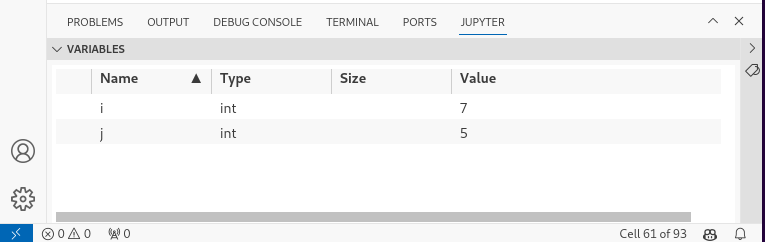

Assegno ad `i` il valore 5.

In [1]:
i = 5

Assegno a `j` lo stesso valore di `i` (cioè 5).


In [2]:
j = i

Incremento `i` di 2. `i` diventa 7, ma `j` giustamente rimane 5.

In [3]:
i = i + 2

Creo una lista `l` contenente le stringhe "a", "b" e "c".

In [63]:
l = [ "a", "b", "c" ]

Copio `l` in `m`, quindi `m` diventa `["a", "b", "c"]`.

In [65]:
m = l

E adesso succede una cosa strana: cambio il valore del primo elemento di `l`, e la modifica si ripercuote in `m`.

In [66]:
l[0] = "ciao"

Se invece cambio tutto `l` con un assegnamento, la modifica resta confinata alla variabile `l`, ed `m` resta invariata.

In [67]:
l = [1, 2, 3]

Adesso le due liste sono separate. Nessuna modifica ad `l` può influenzare `m`. Se cambio il primo valore di `l`, `m` rimane fissa.

In [68]:
l [0] = 333

Facciamo ancora un altro esempio. Reinizializzo `l` e lo copio in `m`.

In [69]:
l = [ "ciao", "sono", "io"]
m = l

Se aggiorno il valore di `l` con il metodo `append`, il nuovo elemento viene aggiunto anche ad `m`.

In [70]:
l.append("xyz")

Ma se aggiungo un elemento usando l'operazione di concatenazione e assegnando il risultato ad `l`, allora la modifica non si ripercuote su `m`.

In [71]:
l = l + ["abc"]

Come è possibile spiegare questo comportamento ?

Quando diciamo che le variabili contengono degli oggetti, stiamo semplificando troppo. In realtà le variabili non contengono direttamente un oggetto, ma un `riferimento` a quell'oggetto, che possiamo pensare come una freccia dal nome della variabile all'oggetto che essa contiene. Tecnicamente, un riferimento è l'indirizzo della locazione di memoria dove risiede l'oggetto (ovviamente l'oggetto può occupare più locazioni se necessario).

Lo spazio di memoria dove risiedono le variabili è solitamente chiamato *interpreter stack*  o solo *stack* (in italiano, pila), mentre lo spazio di memoria adove risiedono gli oggetti è spesso chiamato *heap* (anche se questo termine non è standard in Python).

Supponiamo di dare la seguente serie di istruzioni:
```python
i = 3
j = i
l = [10, 20, 30]
m = l
```
Quello che accade è:
  * viene creato un oggetto contentente il l'oggetto `3`, e la variabile `i` viene fatta puntare a questo oggetto.
  * il riferimento presente in `i` viene copiato in `j`, il risultato è che `j` punta allo stesso oggetto di `i`.
  * viene creata una oggetto contenente la lista `[10, 20, 30]` e la variabile `l` viene fatta puntare ad essa.
  * il puntatore presente in `l` viene copiato in `m`, il risultato è che `m` punta allo stesso oggetto di `l`.

Questa è la rappresentazione grafica della situazione.

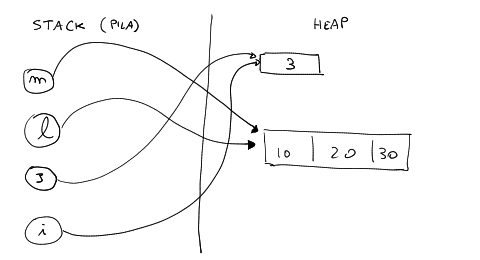

Il fatto che `l` ed `m` si riferiscono allo stesso oggetto si afferma dicendo che `l` ed `m` sono *alias*. In teoria anche `i` e `j` sono alias, ma di solito questo termine non si usa per i tipi interi e gli altri tipi immutabili (vedremo poi cosa vuol dire in dettaglio il termine *immutabile*).

Eseguiamo ora l'istruzione:
```python
l[1] = 99
```
Il risultato è che nell'oggetto puntato da `l`, l'elemento in posizione 1 viene rimpiazzato da 99.

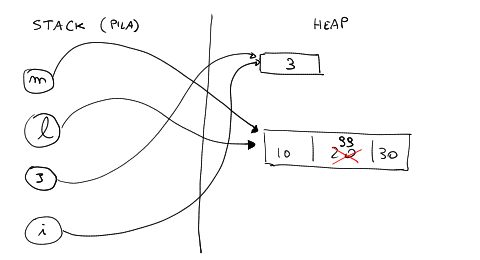

Ma così facendo abbiamo cambiato anche il valore di `m`!!

Nel momento in cui assegnamo ad `l` una nuova lista, con
```python
l = ["Ciao", "ab"]
```
si spezza il legame che la lega ad `m`, e le due variabili si riferiscono a oggetti distinti.

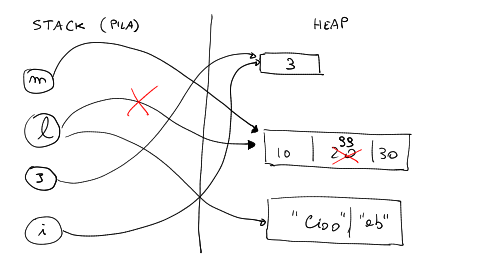

Stessa cosa accade con il metodo `append`. Il metodo modifica l'oggetto di tipo lista a cui è applicato. Supponiamo sia:
```python
l = ["Ciao", "sono"]
m = l
```
Ovvero, si ha questa situazione:

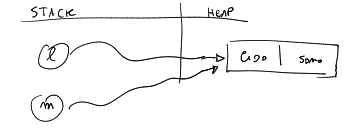

Dopo l'istruzione
```python
l.append(10)
```
otteniamo

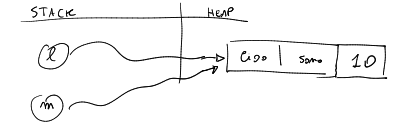

e anche la variabile `m` è stata modificata.

Invece l'istruzione
```python
l = l + [20]
```
fa una cosa completamente diversa: 
  * crea un oggetto nello heap contenente la lista `[20]`, oggetto che non è puntato da alcuna variabile;
  * concatena l'oggetto puntato da `l` con il nuovo oggetto `[20]`, creando una **nuova** lista, senza modificare la lista originaria;
  * camba la variabile `l` in modo che punti alla nuova lista concatenata.
La situazione è dunque:

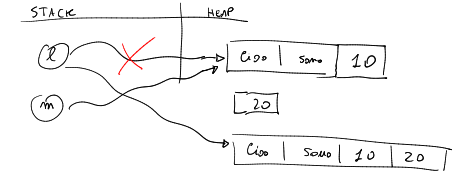

Notare che la stessa situazione si verifica anche per qualunque altro tipo di dato. Ad esempio, 
```python
s = "Ciao"
r = s
k = "Ciao"
```
dà origine alla seguente organizzazione in memoria:

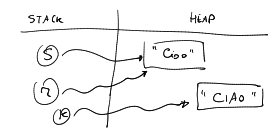

Notare che `s` ed `r` sono alias, mentre `k` punta ad un altro oggetto in memoria, sebbene con lo stesso contenuto del primo. Il motivo però per cui non ci siamo prima interessati della cosa e non ci siamo mai accorti di questo comportamento, è che non esiste nessun modo di alterare un oggetto di tipo stringa una volta che è stato creato. Ad esempio, non è possibile modificare un carattere con una istruzione del tipo `s[0]="T"`. Inoltre, tutti i metodi che operano sulle stringhe non modificano mai la stringa di partenza, ma ne creano una nuova (si pensi, ad esempio, al metodo `upper()` per convertire in maiuscolo).

Poiché non è possibile modificare un oggetto di tipo stringa già presente in memoria, si dice che le stringhe in Python sono un tipo di dato *immutabile*. Lo stesso vale per interi, numeri in virgola mobile, booleani e tutti gli altri tipi che abbiamo già visto tranne il tipo lista e i tipi *GraphicsWindow*, *GraphicsCanvas* e *GraphicsImage* della libreria *ezgraphics*.

## Per maggior precisione

In realtà, anche quella che vi ho presentato sopra è una versione semplificata della realtà. Secondo quanto detto sopra, infatti, sembrerebbe che una lista sia una sequenza di oggetti. Ma in realtà, le liste non contengono una sequenza di oggetti, ma una sequenza di riferimenti. Ad esempio, la istruzioni

```python
l = ["Ciao", 10, 20]
```

non causano in realtà questa organizzazione della memoria:

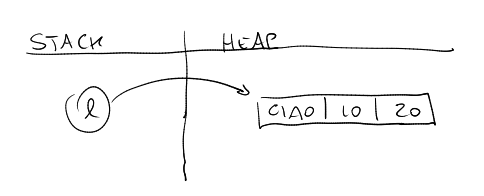

ma quest'altra

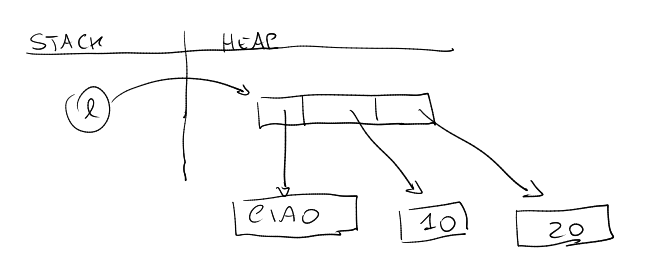

Se a qesto punto diamo il comando 
```python
v = l[1]
```

si ottiene 

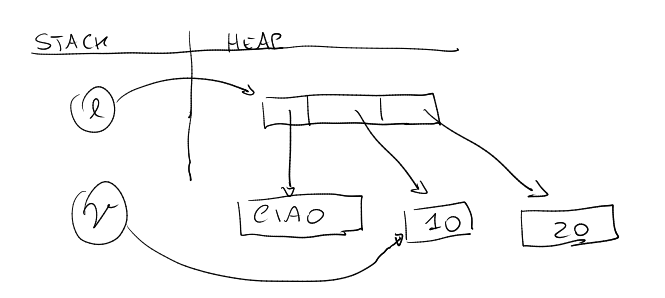

Tuttavia, finché si opera con tipi immutabili, non è un grosso problema pensare che una variabile o una lista contengano direttamente oggetti invece che riferimenti.

## La funzione `id`

In Python ci sono vari modi per determinare se due oggetti sono in realtà lo stesso. Uno di questi è la funzione `id(x)` che restituisce l'*identità* di `x`: è un intero che è garatito essere costante er un oggetto `x`. Se due oggetti sono in realtà lo stesso, il valore restiuito da `id` è uguale. Per CPython (l'implementazione standard di Python) `id` è proprio l'indirizzo in memoria dove risiede l'oggetto.

In [7]:
l = [1,2,3]

In [8]:
id(l)

139782533728576

In [9]:
m = l

Si vede che l'id di `m` e lo stesso di `l` perché le due variabili puntano in realtà alla stessa lista.

In [10]:
id(m)

139782533728576

In [11]:
n = [1,2,3]

Sebbene `n` contenga gli stessi valori di `l` ed `n`, l'istruzione di assegnamento qua sopra crea una lista completamente nuova, quindi il suo `id` è diverso.

In [16]:
id(n)

139782533728448